In [1]:
from imret.dataset import Dataset
from imret.color import ColorPalette

In [2]:
dset = Dataset('../data/datasets/', 'test', '../data/images/')

In [3]:
cp = ColorPalette(name_conversion='../data/query/name_conversion.csv')

In [4]:
objs = {img: filter(lambda x: x in cp, dset.ground_truth_objects(img)) for img in dset.images}

In [5]:
import graphviz as gv
import itertools

In [6]:
nodes = set()
edges = {}
connections = {}

for k, obj in objs.items():
    for node in obj:
        node = 'car' if node == 'cars' else node
        node = 'rock' if node == 'rocks' else node
        node = 'flower' if node == 'flowers' else node
        
        if node not in nodes: 
            nodes.add(node)
        
    for node1, node2 in itertools.combinations(obj, 2):
        node1 = 'car' if node1 == 'cars' else node1
        node1 = 'rock' if node1 == 'rocks' else node1
        node1 = 'flower' if node1 == 'flowers' else node1
        
        node2 = 'car' if node2 == 'cars' else node2
        node2 = 'rock' if node2 == 'rocks' else node2
        node2 = 'flower' if node2 == 'flowers' else node2
        
        
        if node1+node2 not in edges and node2+node2 not in edges:
            edges.setdefault(node1, []).append(node2)
            edges.setdefault(node2, []).append(node1)
            
            connections.setdefault(node1, []).append((k, node2))
            connections.setdefault(node2, []).append((k, node1))

In [71]:
len(edges), len(nodes), len(connections)

(42, 42, 42)

In [75]:
import collections
collections.Counter(edges['airplane'])

Counter({u'armchair': 1,
         u'balcony': 1,
         u'books': 1,
         u'box': 1,
         u'building': 26,
         u'car': 24,
         u'door': 2,
         u'fence': 4,
         u'floor': 3,
         u'grass': 8,
         u'ground': 2,
         u'plant': 1,
         u'road': 29,
         u'sign': 3,
         u'sky': 33,
         u'streetlight': 2,
         u'table': 1,
         u'tree': 11,
         u'van': 5,
         u'wall': 4,
         u'water': 1,
         u'window': 4})

In [149]:
pair = {}
g1 = gv.Graph(format='png')
scene_ = 0
blacklist = ['floor']
for node in nodes:
    if scene_objects[node] != scene_:
        continue
    g1.node(node)

for node, edge in edges.items():
    if scene_objects[node] != scene_:
        continue
        
    if node not in edges:
        continue
        
    edge = edges[node]
    freq = collections.Counter(edge)
    for obj, counter in freq.items():
        if obj in blacklist:
            continue 
            
        if scene_objects[obj] != scene_:
            continue
        
        if counter > 10 and not pair.get(tuple((node, obj))):
            g1.edge(node, obj)
            pair[tuple((node, obj))] = True
            pair[tuple((obj, node))] = True
            
filename = g1.render(filename='img/g1')
print filename

img/g1.png


In [99]:
frequencies = {}
for node, edge in edges.items():
    freq = collections.Counter(edge)
    frequencies[node] = len(freq)

In [102]:
for node, freq in sorted(frequencies.items(), key=lambda x: x[1], reverse=True):
    print u"{:20s}: {}".format(node, freq)

wall                : 41
floor               : 41
window              : 41
plant               : 41
table               : 40
door                : 40
chair               : 39
sign                : 38
tree                : 38
flower              : 37
box                 : 37
sky                 : 35
poster              : 35
grass               : 35
bench               : 34
vase                : 34
building            : 33
fence               : 32
mirror              : 31
curtain             : 31
road                : 30
armchair            : 29
books               : 29
ground              : 29
car                 : 28
bottle              : 28
basket              : 28
streetlight         : 27
balcony             : 27
cupboard            : 26
seats               : 25
desk                : 25
water               : 24
bookcase            : 24
coffee table        : 24
van                 : 23
gate                : 23
path                : 23
airplane            : 22
closet              : 21


In [13]:
scenes_labels = {0: "outdoor", 1: "indoor"}
indoor_scenes = [(1, "wall"),
                (1, "floor"),
                (1, "window"),
                (1, "plant"),
                (1, "table"),
                (0, "door"),
                (1, "chair"),
                (0, "sign"),
                (0, "tree"),
                (1, "flower"),
                (1, "box"),
                (0, "sky"),
                (1, "poster"),
                (0, "grass"),
                (0, "bench"),
                (1, "vase"),
                (0, "building"),
                (0, "fence"),
                (1, "mirror"),
                (1, "curtain"),
                (0, "road"),
                (1, "armchair"),
                (1, "books"),
                (1, "ground"),
                (0, "car"),
                (1, "bottle"),
                (1, "basket"),
                (0, "streetlight"),
                (0, "balcony"),
                (1, "cupboard"),
                (1, "seats"),
                (1, "desk"),
                (0, "water"),
                (1, "bookcase"),
                (1, "coffee table"),
                (0, "van"),
                (0, "gate"),
                (0, "path"),
                (0, "airplane"),
                (1, "closet"),
                (0, "rock"),
                (1, "refrigerator")]

scene_objects = {v:k for k, v in indoor_scenes}

In [14]:
import collections
collections.Counter(scene_objects.values())

Counter({0: 18, 1: 24})

In [15]:
scene_images ={}
for img in dset.images:
    totals = collections.Counter([scene_objects[obj.replace('cars', 'car').replace('rocks', 'rock').replace('flowers', 'flower')] 
                                  for obj in objs[img]]).most_common()
    try:
        scene, _ = totals[0]
        scene_images[img] = scenes_labels[scene]
    except IndexError:
        print(img)

a_aircraft_carrier_aircraft_carrier_000104.jpg
a_aircraft_carrier_aircraft_carrier_000197.jpg
a_airlock_124029main_fd5_iss011e11346_low.jpg
a_aquarium_worldaquarium.jpg
a_archive_archive06.jpg
a_arena_arena_000401.jpg
b_bakery_bakery_01_17_yahoo.jpg
b_bakery_bakery_09_11_yahoo.jpg
b_bakery_bakery_14_17_yahoo.jpg
b_bakery_bakery_17_17_yahoo.jpg
b_bakery_boulangerie_17_17_yahoo.jpg
b_ball_pit_123891179_3c553b3dba.jpg
b_ball_pit_2682065870078020461bnlbah_fs_b.jpg
b_batters_box_batters_box_000118.jpg
b_bleachers_bleachers_000481.jpg
b_butchery_meat_market_000105.jpg
e_elevator_elevator_google_0060.jpg
f_farmers_market_farmers_market_000159.jpg
f_fireplace_fireplace_000004.jpg
f_fireroom_fireroom_000135.jpg
g_groundwork_groundwork01.jpg
i_ice_field_ice_field_000001.jpg
i_ice_field_ice_field_000193.jpg
i_ice_floe_ice_floe_000104.jpg
i_iceberg_05ant_10939_iceberg_ship_3.jpg
i_igloo_we_built_an_igloo_b_7.jpg
i_island_1889095_turtle_island_busuanga_palawan_palawan_1.jpg
i_island_islandaeriallar

In [16]:
os.path.join("/Users/danilonunes/workspace/imret2/data/scene/test", label, image)

u'/Users/danilonunes/workspace/imret2/data/scene/test/hybrid/b_barndoor_barn_door_000015.jpg'

In [17]:
!ls /Users/danilonunes/workspace/imret2/data/images/b_building_facade_insidecity_hous79.jpg

/Users/danilonunes/workspace/imret2/data/images/b_building_facade_insidecity_hous79.jpg


In [18]:
import os
for image, label in scene_images.items():
    os.symlink(os.path.join("/Users/danilonunes/workspace/imret2/data/images/", image), 
               os.path.join("/Users/danilonunes/workspace/imret2/data/scene/test", label, image))

In [47]:
os.path.join("../data/images/", image)

u'../data/images/b_bathroom_indoor_0404.jpg'

In [166]:
!ls ../data/images/b_bathroom_indoor_0404.jpg

../data/images/b_bathroom_indoor_0404.jpg


In [167]:
os.path.join("../data/scene/", label, image)

u'../data/scene/indoor/b_bathroom_indoor_0404.jpg'

In [169]:
ls -la ../data/scene/indoor/b_bathroom_indoor_0404.jpg

lrwxr-xr-x  1 danilonunes  staff  41 Aug 19 18:01 ../data/scene/indoor/b_bathroom_indoor_0404.jpg@ -> ../data/images/b_bathroom_indoor_0404.jpg


In [48]:
idx = 200
print scene_images[dset.images[idx]]
scenes_ = {v:k for k,v in scenes_labels.items()}

print dset.ground_truth_objects(dset.images[idx])

print [obj for obj in dset.ground_truth_objects(dset.images[idx]) if scene_objects.get(obj) is not None and 
       scene_objects.get(obj) in [scenes_[scene_images[dset.images[idx]]], 2]]

outdoor
[u'building', u'car', u'car6', u'person', u'person47', u'road', u'sidewalk', u'sky', u'tree', u'tree42', u'tree43', u'tree45', u'van', u'van4', u'window', u'window10', u'window11', u'window12', u'window13', u'window14', u'window15', u'window16', u'window17', u'window18', u'window19', u'window20', u'window21', u'window22', u'window23', u'window24', u'window25', u'window26', u'window27', u'window28', u'window29', u'window30', u'window31', u'window32', u'window33', u'window34', u'window35', u'window36', u'window37', u'window38', u'window39', u'window40', u'window8', u'window9']
[u'building', u'car', u'road', u'sky', u'tree', u'van']


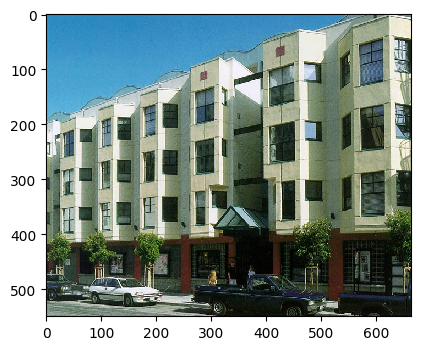

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(dset.get_im_array(dset.images[idx], rgb=True))